## Telecom_Customer_Churn

#### Data Description

Customer churn is a term used when a customer decides to stop using the services of the business. Businesses do customer churn analysis all the time because it is very helpful for a company if they learn which customers are about to leave.

#### Objective

The aim of this project is to train a machine learning model on the available data to train a machine learning model that will predict with a high accuracy which customers are about to churn, which in turn will help the business owner in making useful marketing decisions.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [96]:
# reading the CSV file into pandas dataframe

df=pd.read_csv(r'C:\Users\Dell\Documents\customer_churn.csv') 

In [3]:
# Read first 5 observations of the dataset

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [5]:
df.shape

(7043, 21)

- The dataset contains 7043 samples. Each sample contains 20 features and 1 Boolean variable “churn” which indicates the class of the sample. There are 20 input features and 1 target variable 

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Description of the columns

Customer ID: A unique ID that identifies each customer.
gender: Whether the customer is a male or a female
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
Partner: Whether the customer has a partner or not (Yes, No)
Dependents: Whether the customer has dependents or not (Yes, No)

Services that each customer has signed up for:
PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Customer account information:
tenure: Number of months the customer has stayed with the company
Contract: The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer

Target Variable:
Churn: Target, Whether the customer has left within the last month or not (Yes or No)



### Exploratory Data Analysis

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- There are 17 categorical variables, 3 numerical variables and one target variable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- From the above info, we find that there are no non null data in some of the columns. Using info, we get a short summary of telecom customer churn dataframe is made. It prints information about index dtype, column dtype, non null values and memory usage.

In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

- Since, there are three numerical variables, we got mean,std deviation, min and max values for the data

#### Checking for null values

In [79]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There is no null data in any of the columns

#### Checking for duplicates

In [12]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

- There are no duplicate rows in the dataset

### Univariate analysis

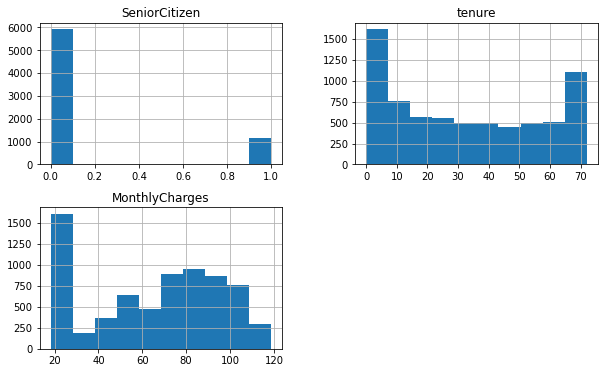

In [99]:
# Plotting the numerical variables in histograms to see their distribution.

df.hist(figsize=(10,6))
plt.show()

#### Let's explore the target variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

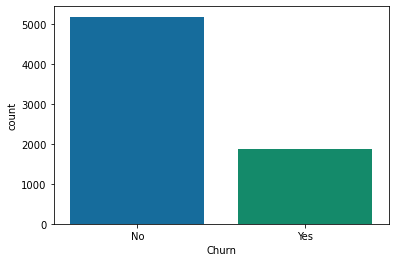

In [101]:
sns.countplot(data=df,x='Churn')

- We find that the customers left within the last month are about 2000.

In [17]:
pip install plotly

In [18]:
import plotly.express as px


In [19]:
churn = df["Churn"].value_counts().to_frame()
churn = churn.reset_index()
churn = churn.rename(columns={'index': 'Category'})
fig = px.pie(churn, values='Churn', names='Category', color_discrete_sequence=["blue", "red"],
             title='Distribution of Churn')
fig.show()

- Based on the above pie chart, we are trying to analyse the 'Churn' target variable i.e., predicting users that have left last month. From the pie plot, we analyse that the data is unbalanced with
    - churn 'Yes' - 26.5%
    - churn 'No' - 73.5%

### Bivariate Analysis

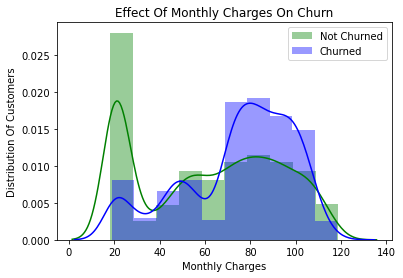

In [86]:
sns.distplot(df[df['Churn']=='No']['MonthlyCharges'], hist=True, bins=10, label='Not Churned', color='green')
sns.distplot(df[df['Churn']=='Yes']['MonthlyCharges'], hist=True, bins=10, label='Churned', color='blue')
plt.title('Effect Of Monthly Charges On Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Distribution Of Customers')
plt.legend()
plt.show()

- It is observed that the customers having monthly charges between 70 to 110 have higher churn distribution

[Text(0.5, 1.0, 'Output plot of distribution of churn rate by gender')]

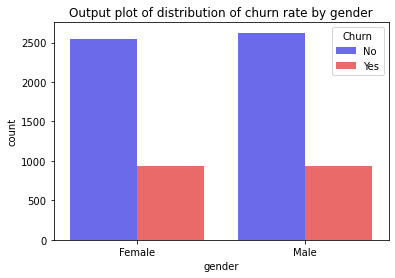

In [27]:
sns.countplot(x='gender',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by gender")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by senior citizen')]

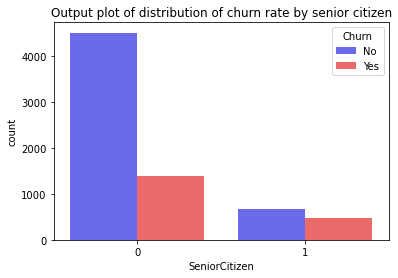

In [28]:
sns.countplot(x='SeniorCitizen',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by senior citizen")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by partner')]

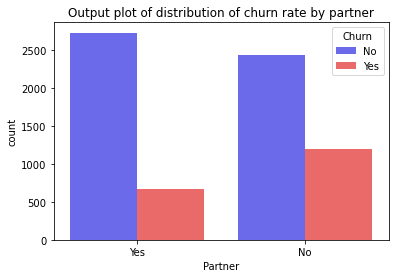

In [29]:
sns.countplot(x='Partner',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by partner")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by dependents')]

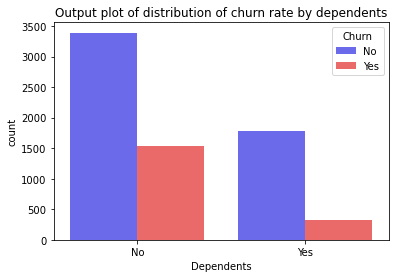

In [30]:
sns.countplot(x='Dependents',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by dependents")


###### Analysis insight from the above graphs:
- Gender and partner are evenly distributed with approximate percentage values.
- The difference in churn is slightly higher in females
- There is a higher proportion of churn in non senior citizens i.e.,younger customers
- There is also higher proportion of churn in the customers with no partners, no dependents.

[Text(0.5, 1.0, 'Output plot of distribution of churn rate by phone service')]

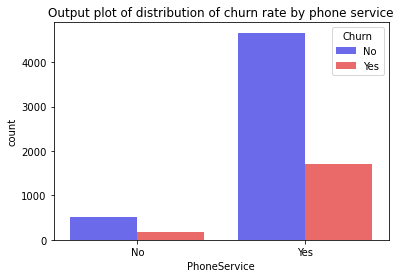

In [31]:
sns.countplot(x='PhoneService',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by phone service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by multiple lines')]

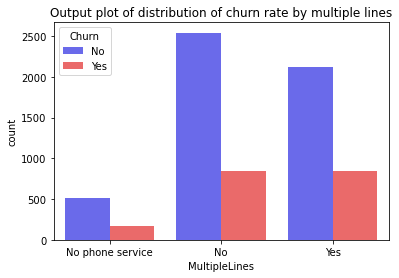

In [32]:
sns.countplot(x='MultipleLines',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by multiple lines")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by Internet service')]

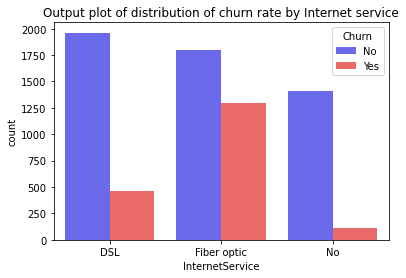

In [33]:
sns.countplot(x='InternetService',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by Internet service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by online security service')]

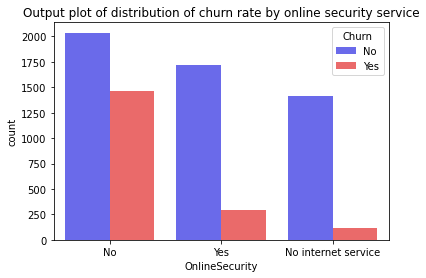

In [38]:
sns.countplot(x='OnlineSecurity',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by online security service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by online backup service')]

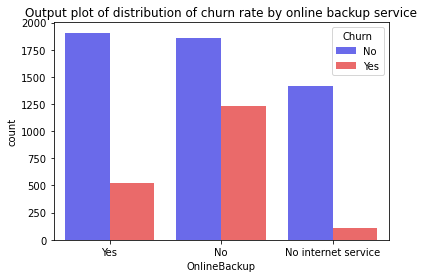

In [39]:
sns.countplot(x='OnlineBackup',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by online backup service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by device protection service')]

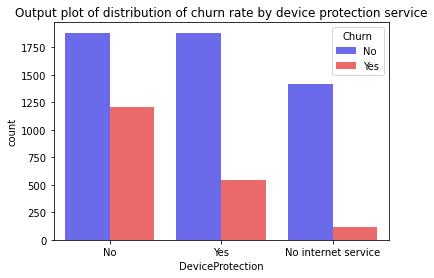

In [40]:
sns.countplot(x='DeviceProtection',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by device protection service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by tech support service')]

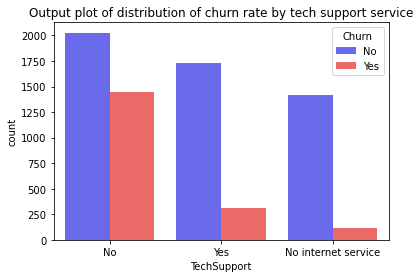

In [41]:
sns.countplot(x='TechSupport',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by tech support service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by streaming TV service')]

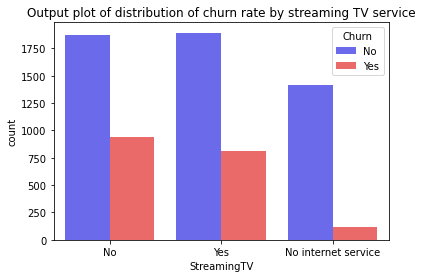

In [42]:
sns.countplot(x='StreamingTV',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by streaming TV service")


[Text(0.5, 1.0, 'Output plot of distribution of churn rate by streaming movies service')]

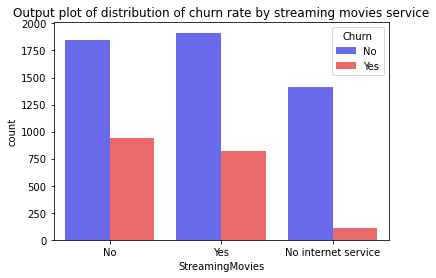

In [43]:
sns.countplot(x='StreamingMovies',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by streaming movies service")


###### Analysis for all the services that the customer has signed up for:
- All these services show significant variations across thier values
- Almost 90% of the customers have phone services
- Those who don't have phone service, they can't have multiple lines
- Customers who have fibre optic as an internet service are more likely to churn
- Fiber optic service is more expensive than DSL, that may be one of the reasons why customers churn
- Customers with no online security, no online backup, no device protection, no techsupport are more likely to churn.
- Streaming TV and movies service is not exactly predictive for churn as its almost evenly distributed for yes and no.

[Text(0.5, 1.0, 'Output plot of distribution of churn rate by contract')]

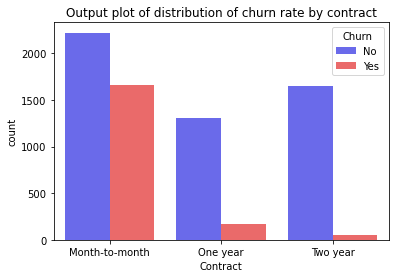

In [46]:
sns.countplot(x='Contract',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by contract")

[Text(0.5, 1.0, 'Output plot of distribution of churn rate by paper less billing')]

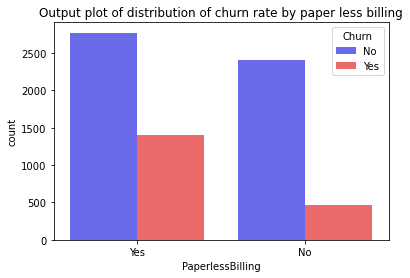

In [47]:
sns.countplot(x='PaperlessBilling',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by paper less billing")

[Text(0.5, 1.0, 'Output plot of distribution of churn rate by payment method')]

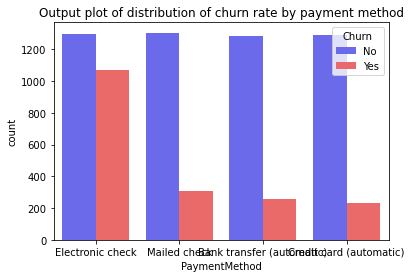

In [48]:
sns.countplot(x='PaymentMethod',data=df,hue='Churn',palette="seismic").set(title="Output plot of distribution of churn rate by payment method")

###### Insights for the customer account information
- The shorter the contract, higher the churn rate
- Two year contract, will have the lowest churn rate
- It explains the motivation for companies to have long-term relationship with their customers
- Churn rate is highest for the customers opting paperless billing
- Customers who pay thorugh electronic check are more likely to churn.

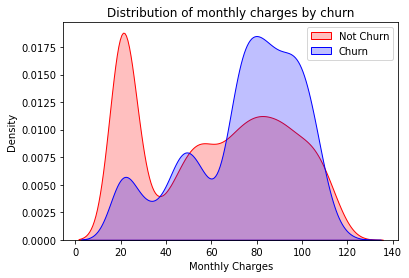

In [80]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

- From the above kde plot, we observe that the customers with higher monthly charges are more likely to churn.

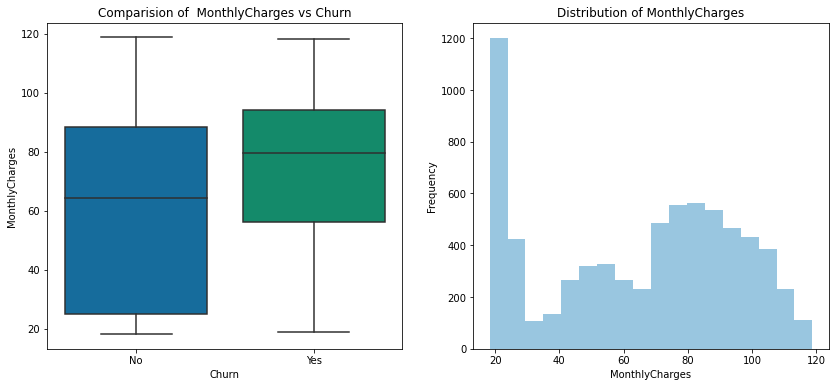

In [104]:
# we are checking the distribution of monthly charges and its related to churn or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Churn", y ="MonthlyCharges" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  MonthlyCharges vs Churn")
    
#distribution plot
ax[1].set_title("Distribution of MonthlyCharges")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['MonthlyCharges'], ax=ax[1], kde=False)
    
plt.show()

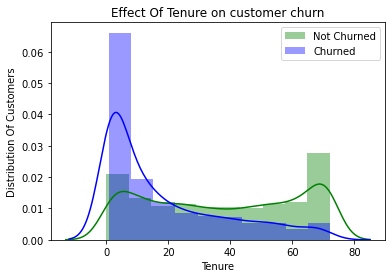

In [85]:
sns.distplot(df[df['Churn']=='No']['tenure'], hist=True, bins=10, label='Not Churned', color='green')
sns.distplot(df[df['Churn']=='Yes']['tenure'], hist=True, bins=10, label='Churned', color='blue')
plt.title('Effect Of Tenure on customer churn')
plt.xlabel('Tenure')
plt.ylabel('Distribution Of Customers')
plt.legend()
plt.show()

- It can be observed that, Customers with a Lower Tenure, are more likely to churn than Customers with a Higher Tenure.

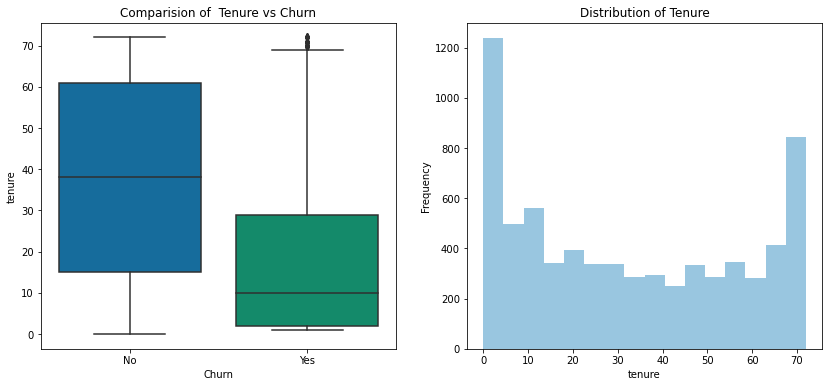

In [107]:
# we are checking the distribution of tenure and its related to churn or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Churn", y ="tenure" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  Tenure vs Churn")
    
#distribution plot
ax[1].set_title("Distribution of Tenure")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['tenure'], ax=ax[1], kde=False)
    
plt.show()

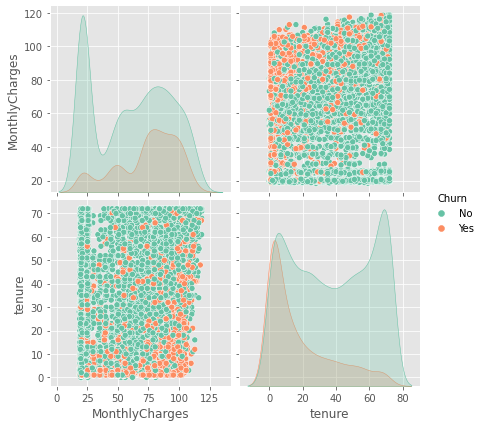

In [108]:
# The relationship between age, monthly income and attrition
plt.style.use('ggplot')
g = sns.pairplot(df, vars=["MonthlyCharges", "tenure"],hue="Churn", palette = 'Set2' ,height=3)

- The customers having tenure period more, donot like to churn 
- Customers having more monthly charges, donot churn more.

##### Let's see the correlation between values

In [109]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [110]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.302253
StreamingMovies_No internet service       -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
InternetService_No                        -0.227890
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtec

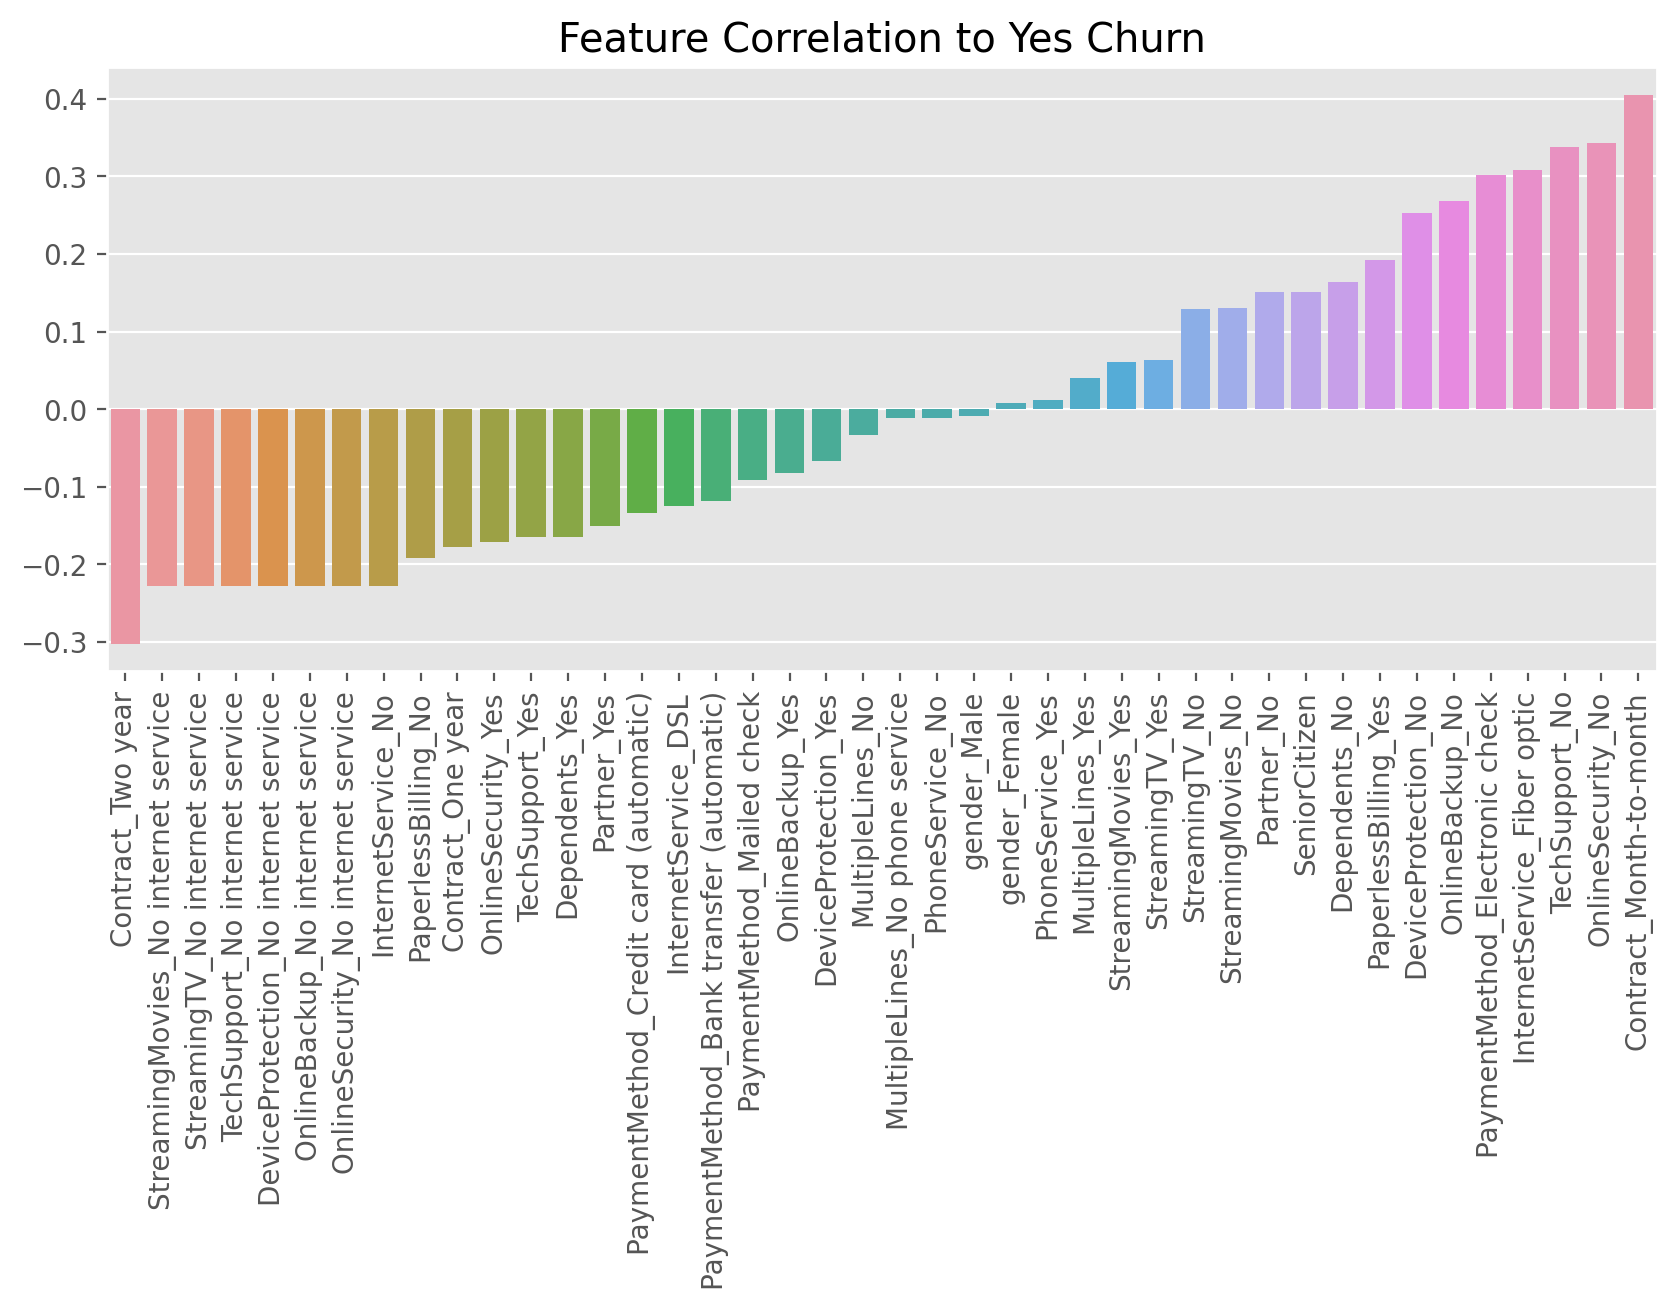

In [111]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);


In [112]:
corr_df['Churn_No'].sort_values().iloc[1:-1]

Contract_Month-to-month                   -0.405103
OnlineSecurity_No                         -0.342637
TechSupport_No                            -0.337281
InternetService_Fiber optic               -0.308020
PaymentMethod_Electronic check            -0.301919
OnlineBackup_No                           -0.268005
DeviceProtection_No                       -0.252481
PaperlessBilling_Yes                      -0.191825
Dependents_No                             -0.164221
SeniorCitizen                             -0.150889
Partner_No                                -0.150448
StreamingMovies_No                        -0.130845
StreamingTV_No                            -0.128916
StreamingTV_Yes                           -0.063228
StreamingMovies_Yes                       -0.061382
MultipleLines_Yes                         -0.040102
PhoneService_Yes                          -0.011942
gender_Female                             -0.008612
gender_Male                                0.008612
PhoneService

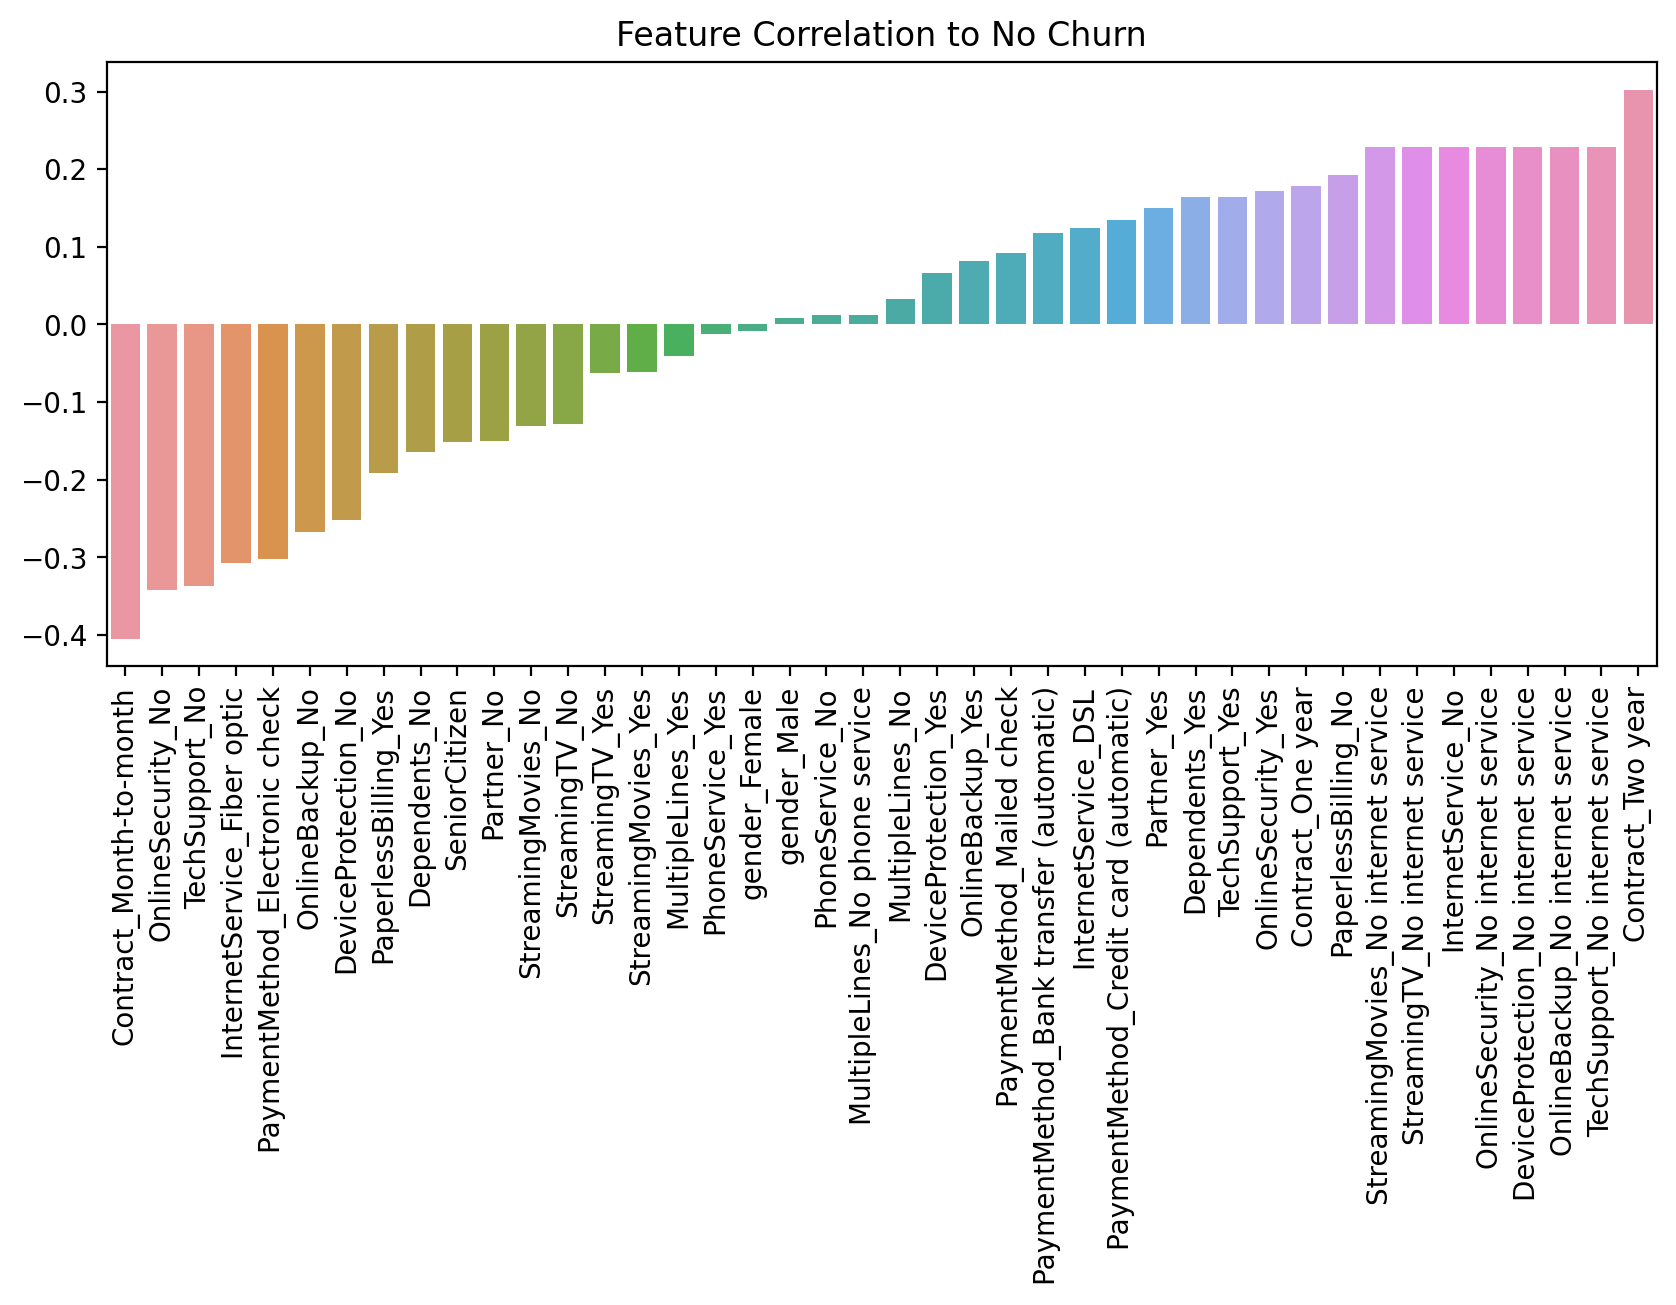

In [94]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_No'].sort_values().iloc[1:-1].index,y=corr_df['Churn_No'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to No Churn")
plt.xticks(rotation=90);

##### Data Processing
- Converting categorical data into numerical data

In [114]:
# There are many encoding techniques. We use label encoder to convert the categorical data into numerical data

from sklearn.preprocessing import LabelEncoder

In [116]:
def encode_column():
 for column in df.columns:
  if df[column].dtype== object:
     df[column] = LabelEncoder().fit_transform(df[column])

 return df.head()

In [117]:
encode_column()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  

[5 rows x 21 columns]

In [118]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

- We see that all object type variables are converted to int type

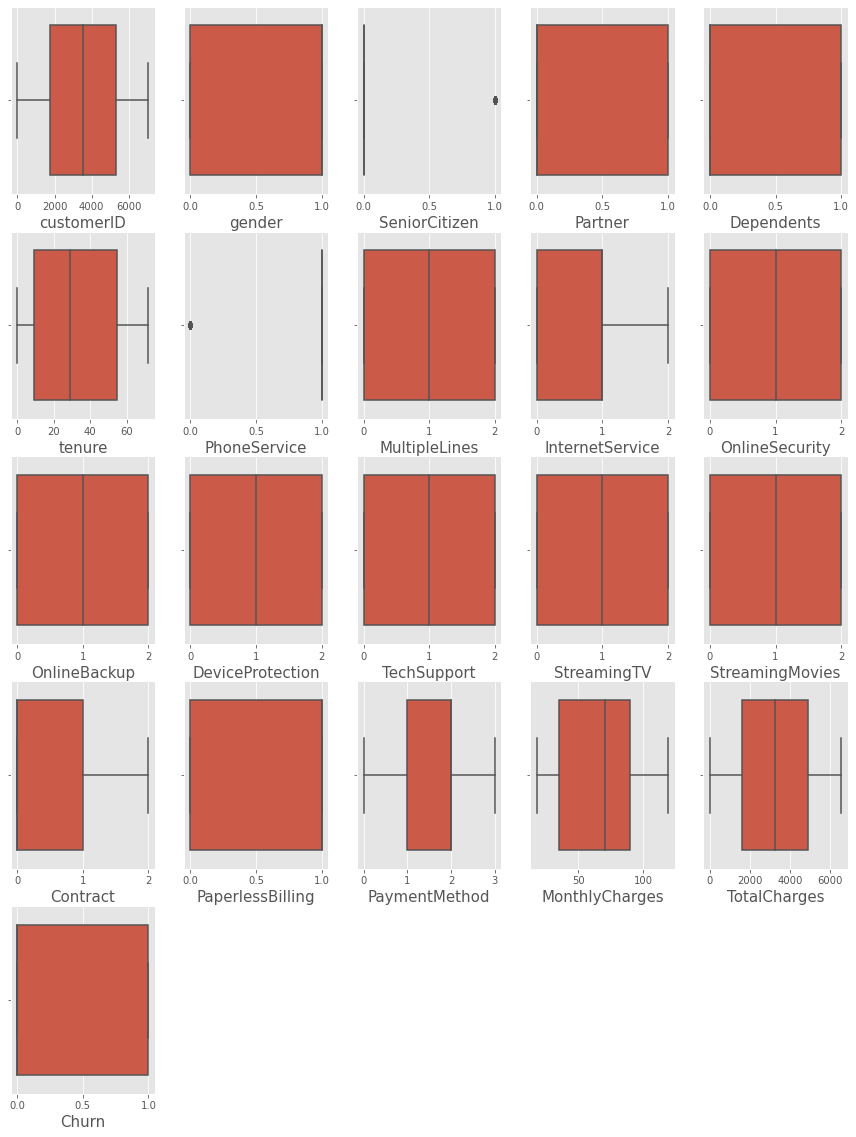

In [119]:
# Boxplots of all the columns

plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=21:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- We find that there are no outliers in the dataset

<AxesSubplot:>

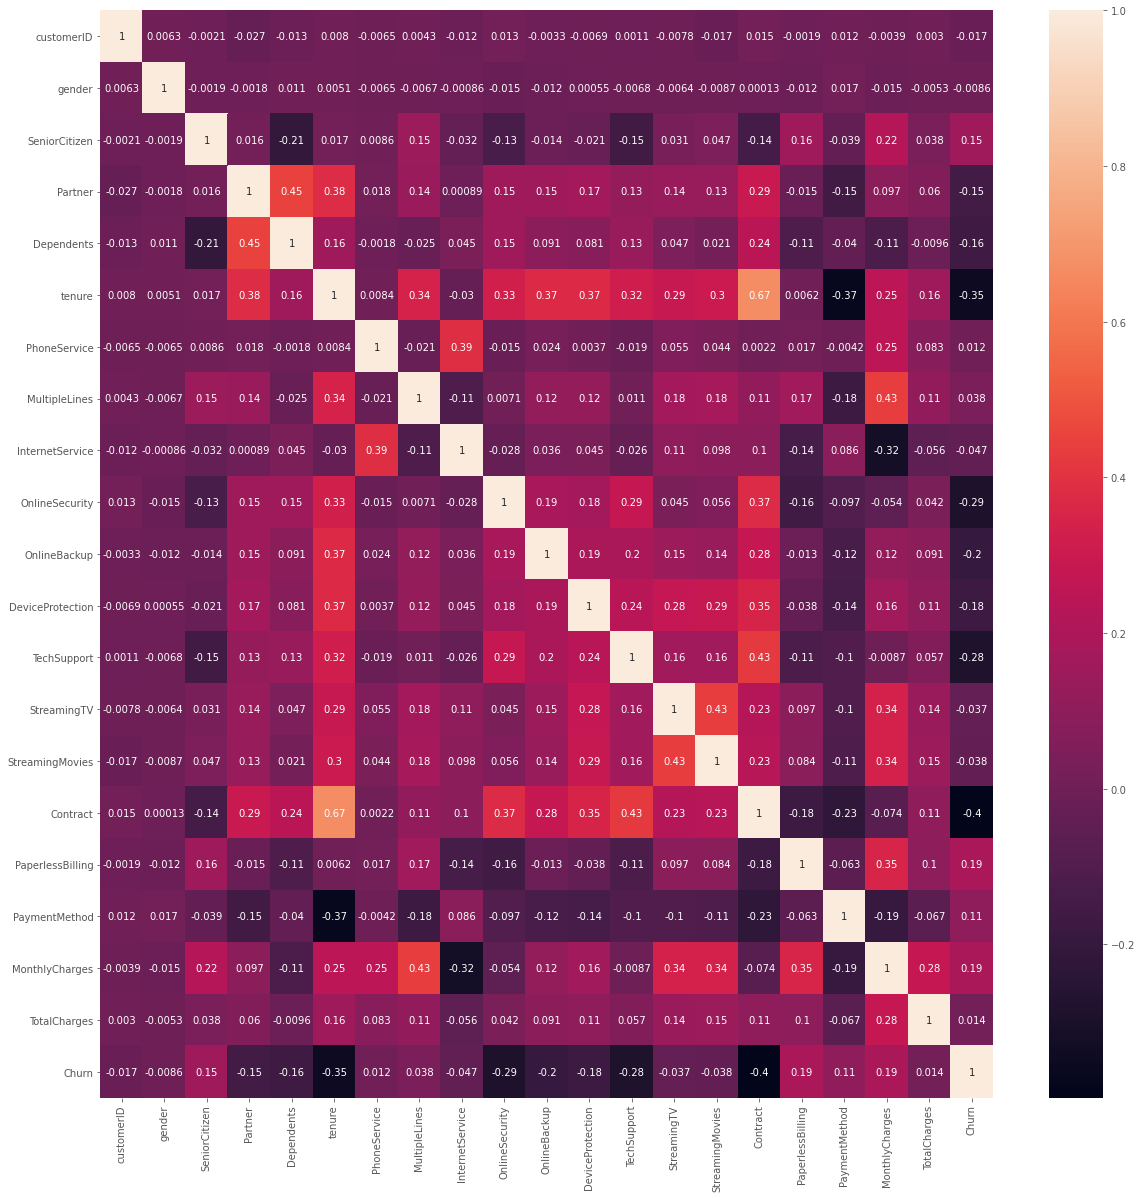

In [120]:
#correlation map

correlation = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot = True)

- Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of them.
- We find that tenure and contract are highly correlated with each other

#### Splitting the data into train and test

In [159]:
from sklearn.model_selection import train_test_split

x = df.drop(['Churn'],axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Building the models

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score,roc_curve

In [172]:
#Defining a function to check the scores,confusion matrix and roc curve of the models

def evaluate_model(model, x_train, x_test, y_train, y_test):   
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    #Calculating Details
    model_train_acc = round(model.score(x_train, y_train) * 100, 2)
    model_test_acc= round(model.score(x_test, y_test) * 100, 2)
    print('Train Score is : ', model_train_acc)
    print('Test Score is : ' , model_test_acc)

    #Calculating Prediction
    accuracy= accuracy_score(y_test , y_pred )
    print('Accuracy Score is:', accuracy )
    precision=precision_score(y_test,y_pred)
    print('Precision score is:',precision)
    rec_score = recall_score(y_test, y_pred)
    print("recall: ",rec_score)
    f1_score= metrics.f1_score(y_test, y_pred,average='weighted')
    print('F1 Score: ', f1_score)
    
    cm = confusion_matrix(y_test , y_pred )
    print('confusion matrix \n',  cm)
    sns.heatmap(cm, center = True)
    plt.show()
    #Check precision, recall, f1-score
    print( classification_report(y_test, model.predict(x_test)))
    
    y_pred_proba=model.predict_proba(x_test)[::,1]
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
    
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### ==========LOGISTIC REGRESSION===========

Train Score is :  80.1
Test Score is :  77.97
Accuracy Score is: 0.7796706416808632
Precision score is: 0.5925925925925926
recall:  0.5183585313174947
F1 Score:  0.7747169248388901
confusion matrix 
 [[1133  165]
 [ 223  240]]


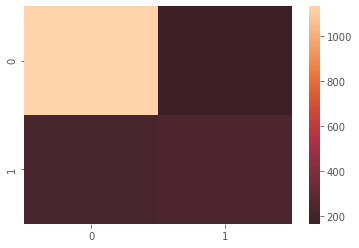

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1298
           1       0.59      0.52      0.55       463

    accuracy                           0.78      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.77      0.78      0.77      1761



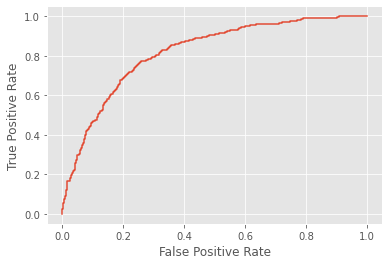

In [173]:
LR=LogisticRegression()
evaluate_model(LR,x_train,x_test,y_train,y_test)

#### ==========K NEIGHBOR CLASSIFIER===========

Train Score is :  77.39
Test Score is :  69.11
Accuracy Score is: 0.6910846110164679
Precision score is: 0.33992094861660077
recall:  0.1857451403887689
F1 Score:  0.6573423298549724
confusion matrix 
 [[1131  167]
 [ 377   86]]


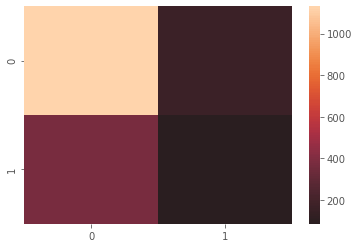

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1298
           1       0.34      0.19      0.24       463

    accuracy                           0.69      1761
   macro avg       0.54      0.53      0.52      1761
weighted avg       0.64      0.69      0.66      1761



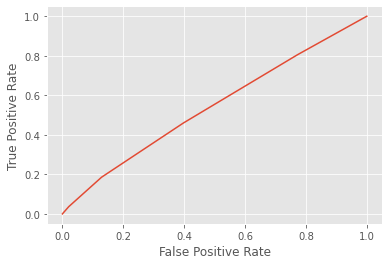

In [174]:
KNN=KNeighborsClassifier()
evaluate_model(KNN,x_train,x_test,y_train,y_test)

#### ==========DECISION TREE CLASSIFIER===========

Train Score is :  100.0
Test Score is :  73.88
Accuracy Score is: 0.7387847813742192
Precision score is: 0.5032397408207343
recall:  0.5032397408207343
F1 Score:  0.7387847813742192
confusion matrix 
 [[1068  230]
 [ 230  233]]


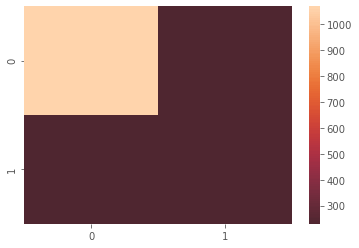

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1298
           1       0.50      0.50      0.50       463

    accuracy                           0.74      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.74      0.74      0.74      1761



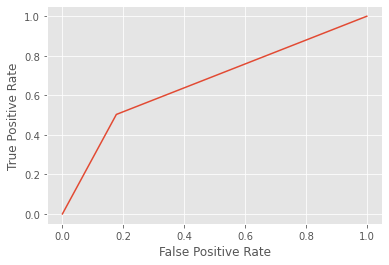

In [175]:
DT=DecisionTreeClassifier()
evaluate_model(DT,x_train,x_test,y_train,y_test)

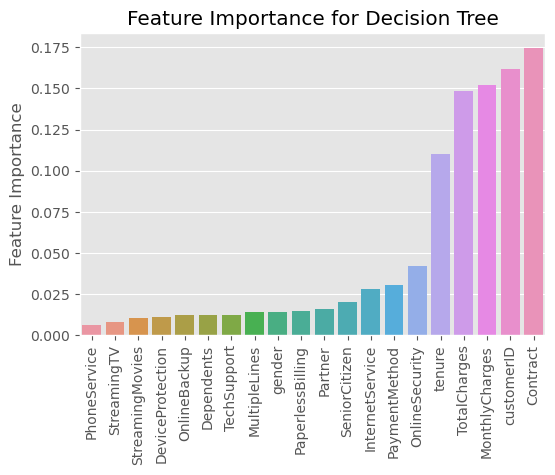

In [176]:
feat_imp = pd.DataFrame(data=DT.feature_importances_,index=x.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(data=feat_imp.sort_values('Feature Importance'),x=feat_imp.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

- Let's keep the important features for this model and drop the less important features

In [166]:
xdt = df.drop(["Churn",'Dependents','PhoneService','StreamingTV','MultipleLines','TechSupport','DeviceProtection',
               'OnlineBackup','gender','Partner','PaperlessBilling','SeniorCitizen','StreamingMovies'],axis=1)
ydt = df["Churn"]

In [167]:
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size=0.2, random_state=0)

Train Score is :  100.0
Test Score is :  71.54
Accuracy Score is: 0.7154009936124911
Precision score is: 0.45758354755784064
recall:  0.483695652173913
F1 Score:  0.7178986138154924
confusion matrix 
 [[830 211]
 [190 178]]


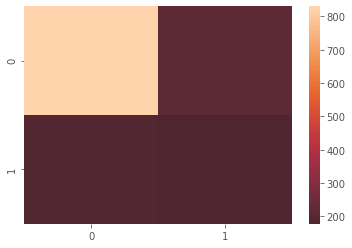

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1041
           1       0.46      0.48      0.47       368

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [168]:
DTF=DecisionTreeClassifier()
evaluate_model(DTF,xdt_train,xdt_test,ydt_train,ydt_test)

- By keeping the important features, the accuracy of the model reduced. So,let us perform hyperparameter tuning on the decision tree classifier model

##### Hyperparameter tuning on Decision Tree Classifier

Train Score is :  78.74
Test Score is :  76.94
Accuracy Score is: 0.7694491766042022
Precision score is: 0.7021276595744681
recall:  0.21382289416846653
F1 Score:  0.720714994467182
confusion matrix 
 [[1256   42]
 [ 364   99]]


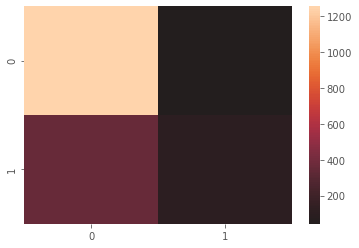

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1298
           1       0.70      0.21      0.33       463

    accuracy                           0.77      1761
   macro avg       0.74      0.59      0.59      1761
weighted avg       0.76      0.77      0.72      1761



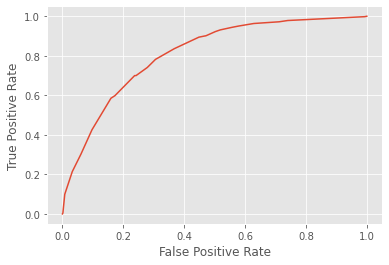

In [177]:
dttuning=DecisionTreeClassifier()
#lets tune the parameters using GridSearchCv
params={'max_features':['auto','log2',None],
        'max_depth':[4,5,6,7,8],
        'class_weight':[{0:2,1:1},{0:3,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4},{0:0.9,1:1.1},{0:0.8,1:1.5},'balanced']
            }

grd=GridSearchCV(dttuning,param_grid=params)
evaluate_model(grd,x_train,x_test,y_train,y_test)

- After performing tuning on decision tree classifier, the accuracy of the model has increased by almost 4%

#### ==========RANDOM FOREST CLASSIFIER===========

Train Score is :  100.0
Test Score is :  78.65
Accuracy Score is: 0.7864849517319704
Precision score is: 0.6204986149584487
recall:  0.4838012958963283
F1 Score:  0.7773058730080827
confusion matrix 
 [[1161  137]
 [ 239  224]]


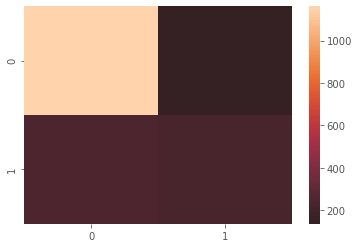

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1298
           1       0.62      0.48      0.54       463

    accuracy                           0.79      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.79      0.78      1761



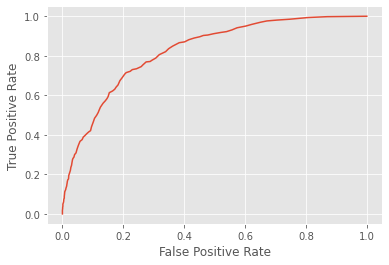

In [188]:
RF=RandomForestClassifier()
evaluate_model(RF,x_train,x_test,y_train,y_test)

##### Hyperparameter tuning on random forest classifier

Train Score is :  85.25
Test Score is :  79.67
Accuracy Score is: 0.7967064168086314
Precision score is: 0.628361858190709
recall:  0.5550755939524838
F1 Score:  0.7924830691564398
confusion matrix 
 [[1146  152]
 [ 206  257]]


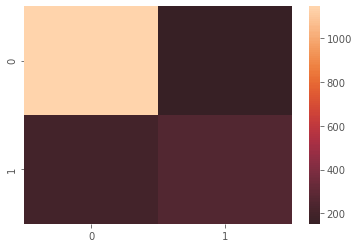

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1298
           1       0.63      0.56      0.59       463

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



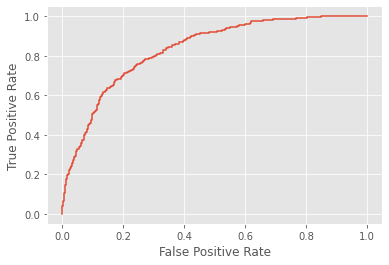

In [189]:
rftuning=RandomForestClassifier()
#lets tune the parameters using GridSearchCv
params={'warm_start':[True,False],
        'max_depth':[4,5,6,7,8],
        'class_weight':[{0:2,1:1},{0:3,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4},{0:0.9,1:1.1},{0:0.8,1:1.5},'balanced']}

grdrf=GridSearchCV(rftuning,param_grid=params)
evaluate_model(grdrf,x_train,x_test,y_train,y_test)

- After tuning the random forest classifier, the accuracy of the model is almost same

#### ==========GAUSSIAN NB===========

Train Score is :  75.9
Test Score is :  75.13
Accuracy Score is: 0.7512776831345827
Precision score is: 0.5194401244167963
recall:  0.7213822894168467
F1 Score:  0.7622519749109382
confusion matrix 
 [[989 309]
 [129 334]]


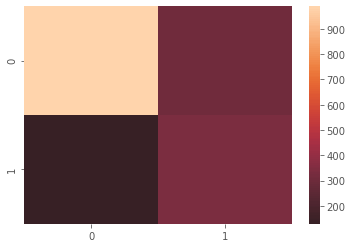

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1298
           1       0.52      0.72      0.60       463

    accuracy                           0.75      1761
   macro avg       0.70      0.74      0.71      1761
weighted avg       0.79      0.75      0.76      1761



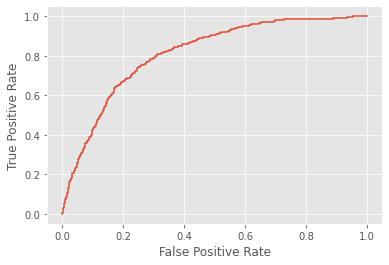

In [180]:
GNB=GaussianNB()
evaluate_model(GNB,x_train,x_test,y_train,y_test)

#### ==========ADA BOOST CLASSIFIER===========

Train Score is :  81.01
Test Score is :  79.05
Accuracy Score is: 0.7904599659284497
Precision score is: 0.6163366336633663
recall:  0.5377969762419006
F1 Score:  0.7856585103226579
confusion matrix 
 [[1143  155]
 [ 214  249]]


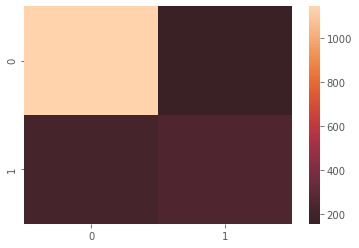

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1298
           1       0.62      0.54      0.57       463

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761



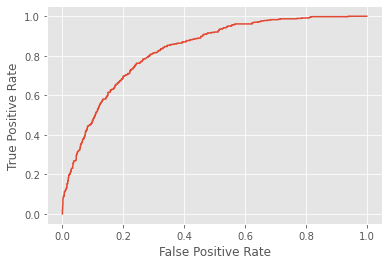

In [181]:
AB=AdaBoostClassifier()
evaluate_model(AB,x_train,x_test,y_train,y_test)

- By training and building all the several models, we find that accuracy score is highest for 'Random Forest classifier' and 'Ada Boost Classifier'i.e.,almost 79%. Hence these two model best fits for predicting the customer churn in any business.
- Now we are considering random forest model(after tuned) and saving that model

### Saving the model

In [190]:
import pickle
filename = 'customerchurn.pkl'
pickle.dump(grdrf, open(filename, 'wb'))

In [191]:
loaded_model=pickle.load(open('customerchurn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

79.67064168086314
